In [1]:
using Plots
using SparseArrays
using LinearAlgebra
using BenchmarkTools
using DifferentialEquations

In [9]:
function set_initial_condition_1(x)
    A = 100.
    l = 80
    A * sin((pi / l ) * x)
end

set_initial_condition_1 (generic function with 1 method)

In [10]:
function heat_equation!(du,u,p,t)
    alpha,dx = p

    du[1] = alpha * (-u[1] + u[2]) / dx^2
    


    for i in 2:(length(u)-1)
        du[i] = alpha * (u[i-1] - 2*u[i] + u[i+1])/dx^2
    end 

    du[end] = alpha * (u[end-1] - u[end]) / dx^2
   
end 

heat_equation! (generic function with 1 method)

In [11]:

L = 80.0
dx = 1
x = 0.0:dx:L


init = set_initial_condition_1.(x)
alpha = 0.5
P = [alpha, dx]

t_begin  = 0.0
t_end = 10000.0
tspan = (t_begin, t_end)

prob = ODEProblem(heat_equation!, init, tspan, P)
sol = DifferentialEquations.solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 48-element Vector{Float64}:
     0.0
     0.003201604392945907
     0.035217648322404975
     0.17789422183536155
     0.4552752876621652
     0.8421651965519716
     1.3517014678630515
     2.0140771606310945
     2.8637313037908534
     3.959006473142624
     ⋮
  1020.565812505939
  1234.9081184899094
  1498.069601755598
  1831.8135079823842
  2280.101839567008
  2937.398248319406
  4078.343403007792
  7177.61838036718
 10000.0
u: 48-element Vector{Vector{Float64}}:
 [0.0, 3.925981575906861, 7.845909572784494, 11.753739745783765, 15.643446504023087, 19.509032201612825, 23.34453638559054, 27.144044986507428, 30.901699437494738, 34.611705707749294  …  34.61170570774933, 30.901699437494752, 27.144044986507414, 23.34453638559055, 19.50903220161286, 15.643446504023098, 11.753739745783754, 7.845909572784507, 3.925981575906895, 1.2246467991473532e-14]
 [0

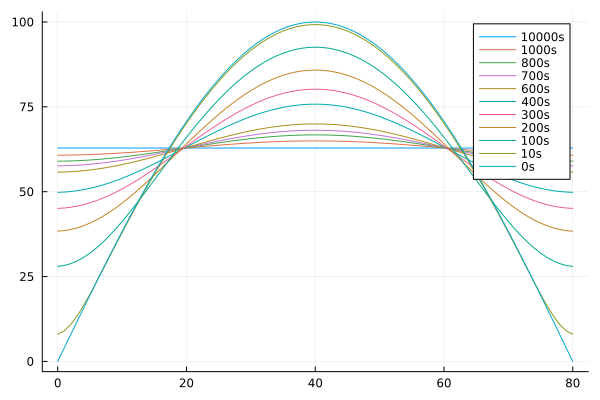

In [12]:
# Access the solution
u_t = sol(t_end)
plot(x,sol(t_end), label = "10000s")
plot!(x,sol(1000), label = "1000s")
plot!(x,sol(800), label = "800s")
plot!(x,sol(700), label = "700s")
plot!(x,sol(600), label = "600s")
plot!(x,sol(400), label = "400s")
plot!(x,sol(300), label="300s")
plot!(x,sol(200), label = "200s")
plot!(x,sol(100), label = "100s")
plot!(x,sol(10), label = "10s")
plot!(x,sol(t_begin), label = "0s")
